# Entanglement for 3 qubits to produce the state: 
$$
|\psi\rangle = \frac{1}{\sqrt{2}} \left( |000\rangle + |111\rangle \right)
$$

{'000': 0.506, '111': 0.494}


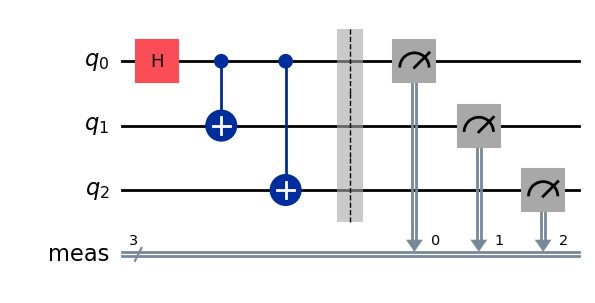

In [1]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import circuit_drawer

ent_circ = QuantumCircuit(3)

ent_circ.h(0)
ent_circ.cx(0, 1)
ent_circ.cx(0, 2)

ent_circ.measure_all()

sampler = StatevectorSampler()

shots = 1000
job = sampler.run([ent_circ], shots=shots)
result = job.result()[0]

counts = result.data.meas.get_counts()

prob_dict = {state: c / shots for state, c in counts.items()}

print(prob_dict)

circuit_drawer(ent_circ, output='mpl', filename='images/entanglement_3_qubits_circuit.png')


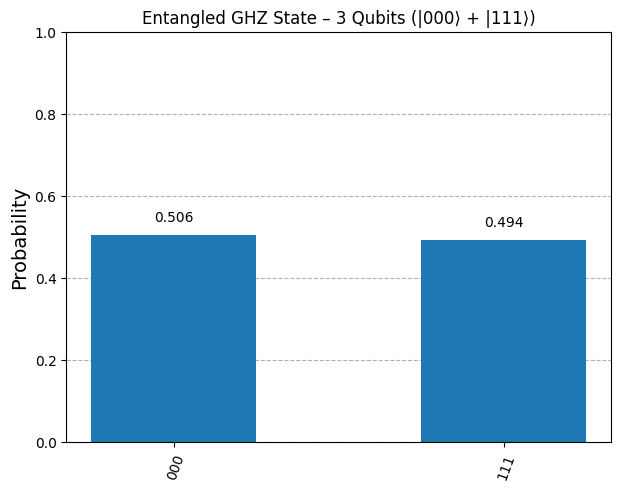

In [2]:
%matplotlib inline

from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Graficar histograma de probabilidades
plot_histogram(prob_dict)
plt.title("Entangled GHZ State – 3 Qubits (|000⟩ + |111⟩)")
plt.ylabel("Probability")
plt.ylim(0, 1)  # eje Y de 0 a 1
plt.savefig("images/entanglement_3_qubits_probabilities.png", dpi=300, bbox_inches='tight')  # opcional
plt.show()